In [2]:
from glob import glob
from os.path import join as pjoin

import gym
import textworld.gym
from textworld import EnvInfos

GAMES_PATH = "sample_games"  # This assumes `sample_games.zip` was first unzipped.
gamefiles = glob(pjoin(GAMES_PATH, "*.ulx"))
print("Found {} games.".format(len(gamefiles)))

Found 10 games.


## Playing a game 

In [3]:
#dir(textworld.agents.RandomCommandAgent())

In [4]:
gamefile = gamefiles[0]  # Pick a game.

requested_infos = EnvInfos(description=True, inventory=True, extras=["recipe", "walkthrough"])
env_id = textworld.gym.register_games([gamefile], requested_infos)

agent = textworld.agents.random.NaiveAgent()

env = gym.make(env_id)
obs, infos = env.reset()
#print("!!!! ", infos.keys())

# Since we asked for more infos, let's print them.
print("Walkthrough:", ". ".join(infos["extra.walkthrough"]))
print(infos["extra.recipe"])

env.render()  # Print the initial observation.

score = 0
done = False
while not done:
    command = agent.act(game_state=obs, reward=score, done=done)
    ob, score, done, infos = env.step(command)
    env.render()
    

Walkthrough: take red apple from counter. take red onion from fridge. take yellow potato from counter. cook red apple with oven. cook yellow potato with stove. drop red onion. take knife from counter. slice red apple with knife. drop knife. take red onion. drop yellow potato. take knife. slice red onion with knife. drop knife. take yellow potato. drop red apple. take knife. slice yellow potato with knife. drop knife. take red apple. prepare meal. eat meal

Recipe #1
---------
Gather all following ingredients and follow the directions to prepare this tasty meal.

Ingredients:
  red apple
  red onion
  yellow potato

Directions:
  slice the red apple
  roast the red apple
  slice the red onion
  slice the yellow potato
  fry the yellow potato
  prepare meal




                    ________  ________  __    __  ________
                   |        \|        \|  \  |  \|        \
                    \$$$$$$$$| $$$$$$$$| $$  | $$ \$$$$$$$$
                      | $$   | $$__     \$$\/  $$  

## Visualizing a `TextWorld.Game` object

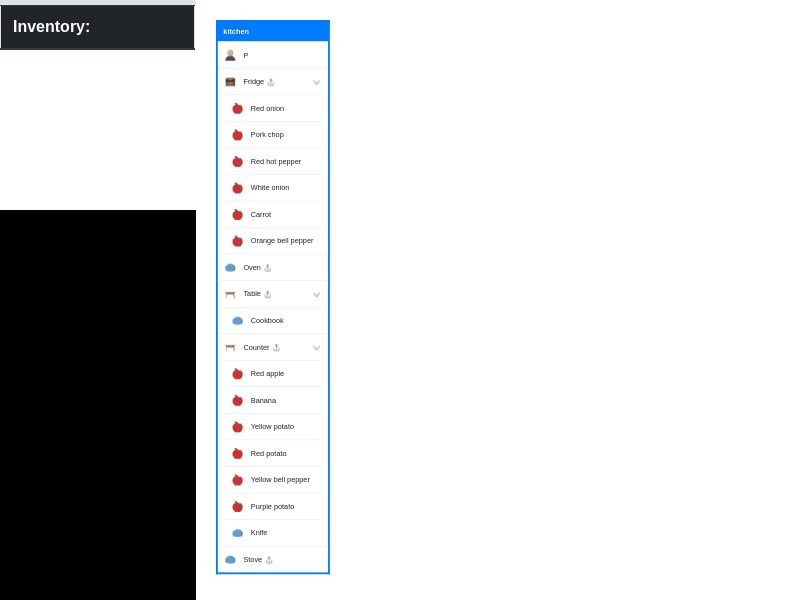

In [22]:
import textworld
gamefile = gamefiles[0]  # Pick a game.
game = textworld.Game.load(gamefile.replace(".ulx", ".json"))
textworld.render.visualize(game)